# OpenPIV examples that you can execute in your browser

Thanks to the great service of mybinder.org

## Import what is necessary from OpenPIV

In [16]:
from openpiv import tools, validation, filters, scaling, pyprocess
import openpiv.pyprocess as process
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from ipywidgets import interact_manual, interactive, fixed, IntSlider, HBox, VBox, Layout

## Read a pair of PIV images

In [17]:
from openpiv.tools import imread
frame_a = imread('../img/case1/ij_47_001_005_b.bmp')
frame_b = imread('../img/case1/ij_47_001_005_c.bmp')

## Show them using matplotlib

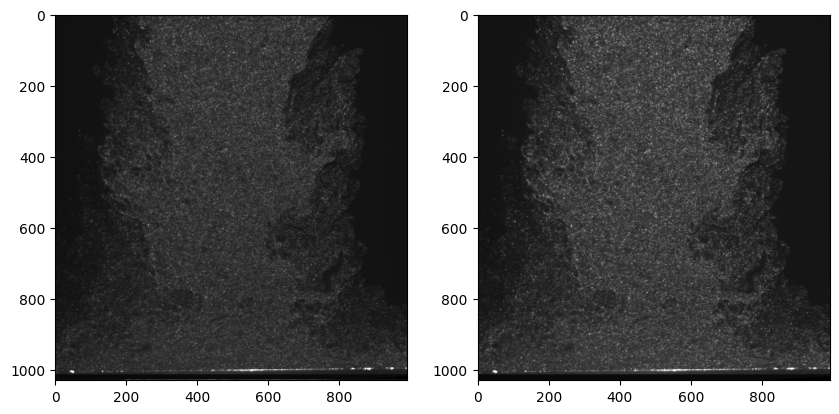

In [18]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)


## Define the PIV analysis parameters

1. Size of the interrogation window in frame A (winsize), 
2. Size of the search window in frame B (searchsize is larger or equal to winsize), 
3. overlap between the neighbouring windows (overlap), 
4. time interval of the PIV recording ($\Delta t$)
5. type of the peak quality (signal-to-noise ratio)

In [19]:
winsize = 24 # pixels
searchsize = 64  # pixels, search in image B
overlap = 12 # pixels
dt = 0.02 # sec

## Run the OpenPIV (fast code, precompiled in Cython)

In [20]:
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), 
                                                     window_size=winsize, overlap=overlap, dt=dt, 
                                                     search_area_size=searchsize, sig2noise_method='peak2peak' )

## Get a list of coordinates for the vector field

In [21]:
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=searchsize, overlap=overlap )

## Clean the peaks that are below a quality threshold

In [22]:
mask = validation.sig2noise_val(sig2noise, threshold = 1.05 )

## Replace those that are masked as bad vectors with local interpolation

In [23]:
u, v = filters.replace_outliers( u, v, mask, method='localmean', max_iter=10, kernel_size=2)

## Scale the results from pix/dt to mm/sec

In [24]:
scale = 96.52 # micron/pixel
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = scale )

## store the result in a text file

In [25]:
tools.save('exp1_001.txt', x, y, u, v, np.zeros_like(u), mask)

## plot the data stored in the text file

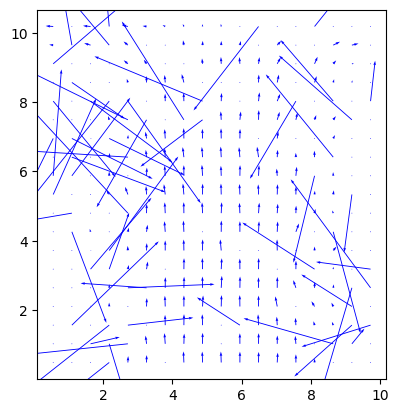

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [26]:
tools.display_vector_field('exp1_001.txt', scale=50, width=0.0025)

# Another example
## Use any pair of images that you can access via URL
For instance we can use images from PIV Challenge http://www.pivchallenge.org/

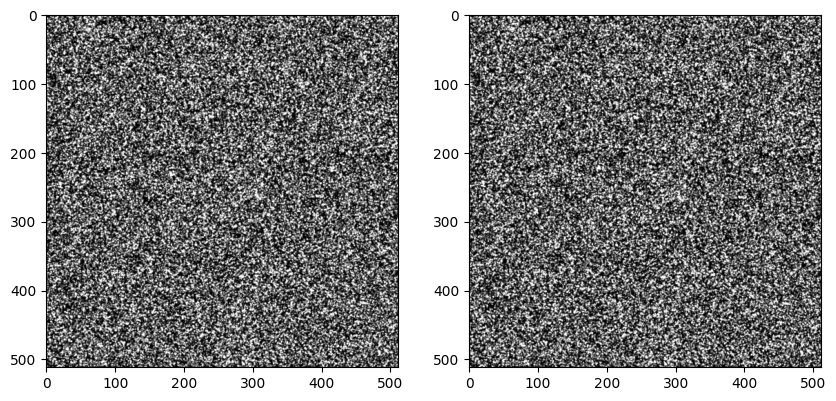

In [27]:
frame_a = tools.imread('http://www.pivchallenge.org/pub/B/B001_1.tif')
frame_b = tools.imread('http://www.pivchallenge.org/pub/B/B001_2.tif')
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

NameError: name 'outliers' is not defined

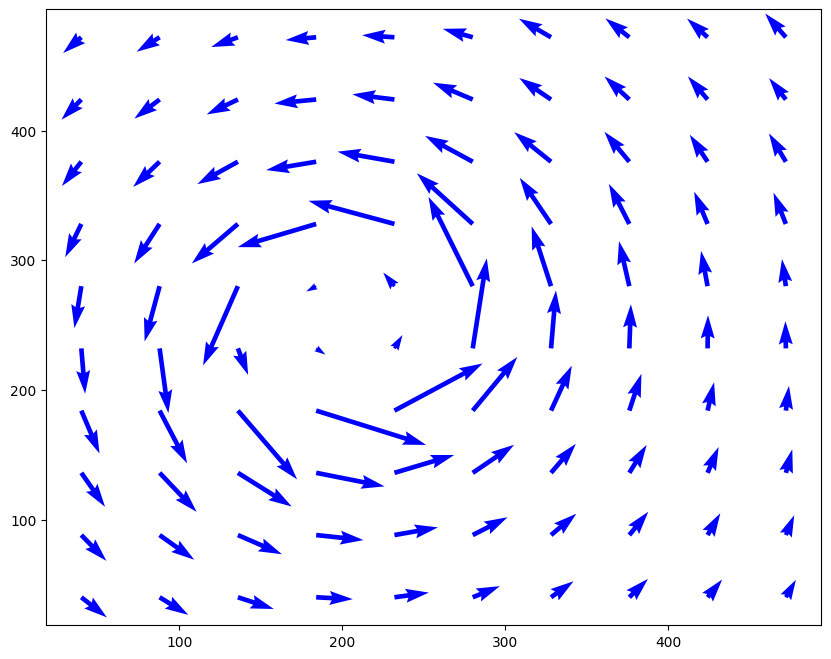

In [28]:
winsize = 32 # pixels
searchsize = 64  # pixels, search in image B
overlap = 16 # pixels
dt = 1.0 # sec
u0, v0, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )
x, y = process.get_coordinates( image_size=frame_a.shape, search_area_size=searchsize, overlap=overlap )
flags = validation.sig2noise_val(sig2noise, threshold = 1.2 )
u, v = filters.replace_outliers(u0, v0, flags, method='localmean', max_iter=10, kernel_size=2)
# x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

plt.figure(figsize=(10,8))
plt.quiver(x,y,u,v,color='b')
plt.quiver(x[outliers],y[outliers],u[outliers],v[outliers],color='r')

## Let's say you want this GIF motion from the excellent JPIV website 

In [45]:
from IPython.display import Image
Image(url='https://eguvep.github.io/jpiv/fig/bode.gif')

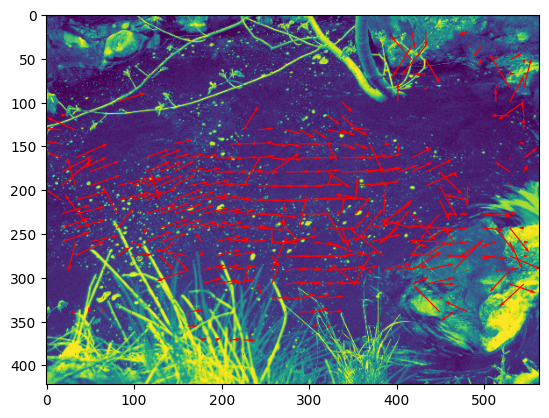

In [74]:
# read it:
gif = tools.imread('https://eguvep.github.io/jpiv/fig/bode.gif')

# convert to gray scale
frame_a = np.round(gif[0],0).astype(np.uint8)
frame_b = np.round(gif[1],0).astype(np.uint8)

from openpiv.piv import simple_piv
x,y,u,v,s2n = simple_piv(frame_a, frame_b, plot=False);
# plot
plt.imshow(gif[0]);
plt.quiver(x,y,u,v,color='r')